In [11]:
import pandas as pd
from config import CAR_RESULTS_FILE, CAR_CSV_FILE
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [100]:
df = pd.read_csv(CAR_CSV_FILE, encoding="utf-8")
df.info()
df.head()

ParserError: Error tokenizing data. C error: Expected 1 fields in line 32, saw 3


In [ ]:
df.rename(columns={
    "Qiymət": "Price",
    "Valyuta": "Currency",
    "Şəhər": "City",
    "Marka": "Marka",
    "Model": "Model",
    "Buraxılış ili": "Production_Year",
    "Ban növü": "Ban_Type",
    "Rəng": "Color",
    "Mühərrik": "Engine",
    "Yürüş": "Mileage",
    "Sürətlər qutusu": "Gearbox",
    "Ötürücü": "Transmission",
    "Yeni": "New",
    "Yerlərin sayısı": "Seats",
    "Vəziyyəti": "Condition",
    "Hansı bazar üçün yığılıb": "Bazar_Type",
    "Sahiblər": "Owners",
    "Qəzalı": "Accident_History"
}, inplace=True)

df[['Engine_Volume', 'Engine_Power', 'Fuel_Type']] = df['Engine'].str.extract(
    r'([0-9]+\.*[0-9]*)\s*L\s*/\s*([0-9]+)\s*a\.g\.\s*/\s*(.*)'
)

# Convert numeric columns safely
df['Engine_Volume'] = df['Engine_Volume'].astype(float)
df['Engine_Power'] = df['Engine_Power'].astype('Int64')
df['Fuel_Type'] = df['Fuel_Type'].astype('category')

df.head()
df


,index,Price,Currency,City,Marka,Model,Production_Year,Ban_Type,Color,Engine,Mileage,Gearbox,Transmission,New,Seats,Condition,Bazar_Type,Owners,Accident_History
0,8827958,59 000,AZN,Bakı,Hyundai,Mighty EX5,2024,Yük maşını,Ağ,2.8 L / 150 a.g. / Dizel,0 km,Mexaniki,Arxa,Bəli,3.0,"Vuruğu yoxdur, rənglənməyib",Avropa,NaN,NaN
1,9465552,40 700,USD,Bakı,Lexus,ES 200,2022,Sedan,Qara,2.0 L / 150 a.g. / Benzin,38 000 km,Avtomat,Ön,Xeyr,5.0,"Vuruğu yoxdur, rənglənməyib",Rəsmi diler,1,NaN
2,9406987,8 000,AZN,Xırdalan,Kia,Rio,2005,"Universal, 5 qapı",Gümüşü,1.5 L / 97 a.g. / Benzin,320 000 km,Avtomat,Ön,Xeyr,5.0,"Vuruğu yoxdur, rənglənməyib",Digər,2,NaN
3,8246407,37 900,USD,Bakı,Mitsubishi,L200,2024,"Pikap, ikiqat kabin",Qara,2.4 L / 147 a.g. / Dizel,0 km,Mexaniki,Tam,Bəli,5.0,"Vuruğu yoxdur, rənglənməyib",Rəsmi diler,NaN,NaN
4,9171648,40 000,AZN,Bakı,Toyota,Corolla,2024,Sedan,Ağ,1.8 L / 136 a.g. / Hibrid,6 000 km,Variator,Ön,Xeyr,5.0,"Vuruğu yoxdur, rənglənməyib",Rəsmi diler,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,9312719,42 000,AZN,Bakı,Toyota,Corolla,2024,Sedan,Ağ,1.8 L / 136 a.g. / Hibrid,18 000 km,Variator,Ön,Xeyr,5.0,"Vuruğu yoxdur, rənglənməyib",NaN,1,NaN
333,9405983,37 000,AZN,Bakı,Mercedes,C 300,2019,Sedan,Ağ,2.0 L / 249 a.g. / Benzin,117 482 km,Avtomat,Arxa,Xeyr,NaN,"Vuruğu yoxdur, rənglənməyib",Amerika,1,NaN
334,9409645,59 800,USD,Sumqayıt,BMW,X5,2021,"Offroader / SUV, 5 qapı",Qara,3.0 L / 340 a.g. / Benzin,89 000 km,Avtomat,Tam,Xeyr,5.0,"Vuruğu yoxdur, rənglənməyib",Amerika,1,NaN
335,9347731,82 800,AZN,Bakı,IM,L6,2025,Liftbek,Qara,787 a.g. / Elektro,0 km,Reduktor,Tam,Bəli,5.0,"Vuruğu yoxdur, rənglənməyib",Rəsmi diler,NaN,NaN


In [111]:
df

,index,Price,Currency,City,Marka,Model,Production_Year,Ban_Type,Color,Engine,...,Transmission,New,Seats,Condition,Bazar_Type,Owners,Accident_History,Engine_Volume,Engine_Power,Fuel_Type
0,8827958,59 000,AZN,Bakı,Hyundai,Mighty EX5,2024,Yük maşını,Ağ,2.8 L / 150 a.g. / Dizel,...,Arxa,Bəli,3.0,"Vuruğu yoxdur, rənglənməyib",Avropa,NaN,NaN,2.8,150,Dizel
1,9465552,40 700,USD,Bakı,Lexus,ES 200,2022,Sedan,Qara,2.0 L / 150 a.g. / Benzin,...,Ön,Xeyr,5.0,"Vuruğu yoxdur, rənglənməyib",Rəsmi diler,1,NaN,2.0,150,Benzin
2,9406987,8 000,AZN,Xırdalan,Kia,Rio,2005,"Universal, 5 qapı",Gümüşü,1.5 L / 97 a.g. / Benzin,...,Ön,Xeyr,5.0,"Vuruğu yoxdur, rənglənməyib",Digər,2,NaN,1.5,97,Benzin
3,8246407,37 900,USD,Bakı,Mitsubishi,L200,2024,"Pikap, ikiqat kabin",Qara,2.4 L / 147 a.g. / Dizel,...,Tam,Bəli,5.0,"Vuruğu yoxdur, rənglənməyib",Rəsmi diler,NaN,NaN,2.4,147,Dizel
4,9171648,40 000,AZN,Bakı,Toyota,Corolla,2024,Sedan,Ağ,1.8 L / 136 a.g. / Hibrid,...,Ön,Xeyr,5.0,"Vuruğu yoxdur, rənglənməyib",Rəsmi diler,1,NaN,1.8,136,Hibrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,9312719,42 000,AZN,Bakı,Toyota,Corolla,2024,Sedan,Ağ,1.8 L / 136 a.g. / Hibrid,...,Ön,Xeyr,5.0,"Vuruğu yoxdur, rənglənməyib",NaN,1,NaN,1.8,136,Hibrid
333,9405983,37 000,AZN,Bakı,Mercedes,C 300,2019,Sedan,Ağ,2.0 L / 249 a.g. / Benzin,...,Arxa,Xeyr,NaN,"Vuruğu yoxdur, rənglənməyib",Amerika,1,NaN,2.0,249,Benzin
334,9409645,59 800,USD,Sumqayıt,BMW,X5,2021,"Offroader / SUV, 5 qapı",Qara,3.0 L / 340 a.g. / Benzin,...,Tam,Xeyr,5.0,"Vuruğu yoxdur, rənglənməyib",Amerika,1,NaN,3.0,340,Benzin
335,9347731,82 800,AZN,Bakı,IM,L6,2025,Liftbek,Qara,787 a.g. / Elektro,...,Tam,Bəli,5.0,"Vuruğu yoxdur, rənglənməyib",Rəsmi diler,NaN,NaN,NaN,NaN,NaN


In [114]:
print(df["Bazar_Type"].unique())
print(df["Marka"].unique())
print(df["Gearbox"].unique())
print(df["Color"].unique())
print(df["Currency"].unique())
print(df["Owners"].unique())
print(df["Accident_History"].unique())
print(df["Production_Year"].unique())
print(df["Ban_Type"].unique())
print(df["Transmission"].unique())
print(df["New"].unique())
#print(df["Mileage"].unique())
print(df["Fuel_Type"].unique())

['Avropa' 'Rəsmi diler' 'Digər' 'Amerika' 'Çin' 'Koreya' nan 'Yaponiya'
 'Rusiya' 'Dubay']
['Hyundai' 'Lexus' 'Kia' 'Mitsubishi' 'Toyota' 'Mercedes' 'Infiniti'
 'Ford' 'Chery' 'Volkswagen' 'Nissan' 'Changan' 'Mazda' 'BMW' 'Renault'
 'Land Rover' 'ZEEKR' 'LADA (VAZ)' 'Iveco' 'Seres Aito' 'BYD' 'Li Auto'
 'FAW' 'XPeng' 'JAC' 'Denza' 'Geely' 'Jeep' 'TVS' 'Honda' 'CFMOTO' 'HOWO'
 'Lincoln' 'Chevrolet' 'Haval' 'Opel' 'JETOUR' 'Genesis' 'Avatr' 'GAZ'
 'Suzuki' 'VGV' 'Porsche' 'DongFeng' 'Skoda' 'Wuling' 'Alfa Romeo' 'Dodge'
 'Audi' 'IM']
['Mexaniki' 'Avtomat' 'Variator' 'Reduktor' 'Robot']
['Ağ' 'Qara' 'Gümüşü' 'Yaş Asfalt' 'Açıq yaşıl' 'Göy' 'Boz' 'Tünd qırmızı'
 'Qırmızı' 'Bej' 'Mavi' 'Qəhvəyi' 'Qızılı' 'Yaşıl']
['AZN' 'USD' 'EUR']
[nan '1' '2' '0' '4 və daha çox' '3']
[nan 'Bəli']
[2024 2022 2005 2018 2023 2016 1986 2019 2011 2025 2020 1999 1994 2006
 2015 2014 2021 2007 2013 1998 2012 2017 2002 2008 2010 2009 2003 2004
 1997 1995 1996 2000]
['Yük maşını' 'Sedan' 'Universal, 5 qapı' 'Pika

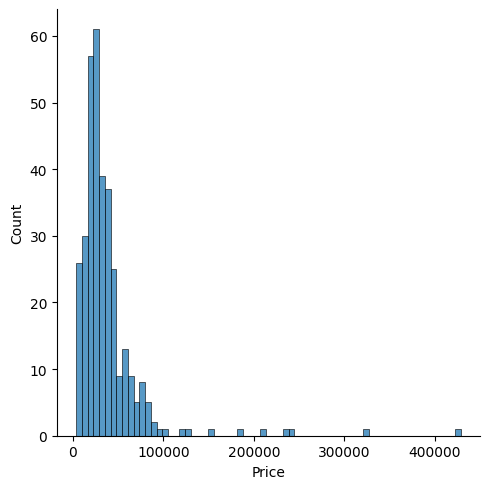

In [61]:
price_data = df['Price'].str.replace(r'\s+', '', regex=True).astype(int)

price_data = price_data.astype(float)
sns.displot(data=price_data)

      Mileage
0         0.0
1     38000.0
2    320000.0
3         0.0
4      6000.0
..        ...
332   18000.0
333  117482.0
334   89000.0
335       0.0
336  172000.0

[337 rows x 1 columns]


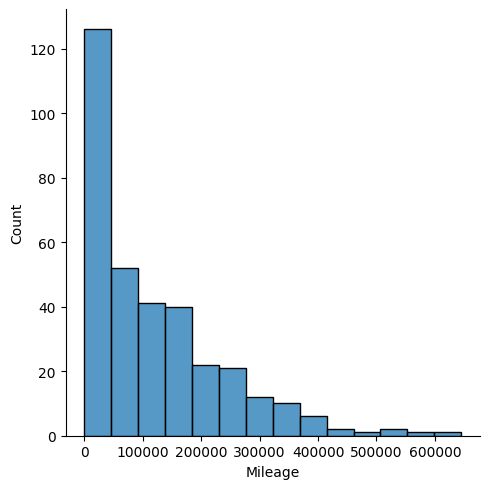

In [98]:
mileage_data = df['Mileage'].str.replace(r'\D+', '', regex=True).astype(int)
mileage_data = mileage_data.astype(float)
mileage_data = pd.DataFrame(mileage_data, columns=["Mileage"])
print(mileage_data)
sns.displot(data=mileage_data, x="Mileage")

<Axes: xlabel='count', ylabel='Count'>

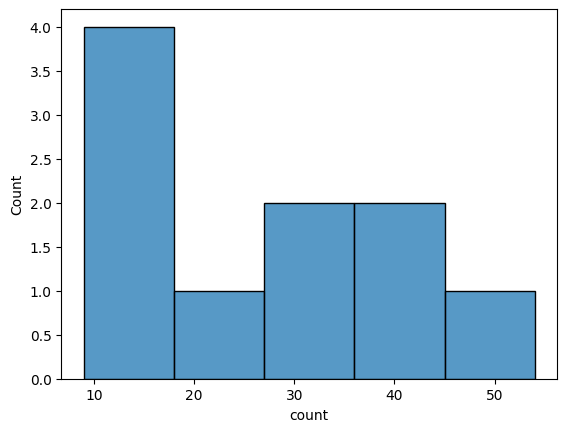

In [ ]:
top_brands = df["Marka"].value_counts().head(10)
sns.histplot(top_brands)

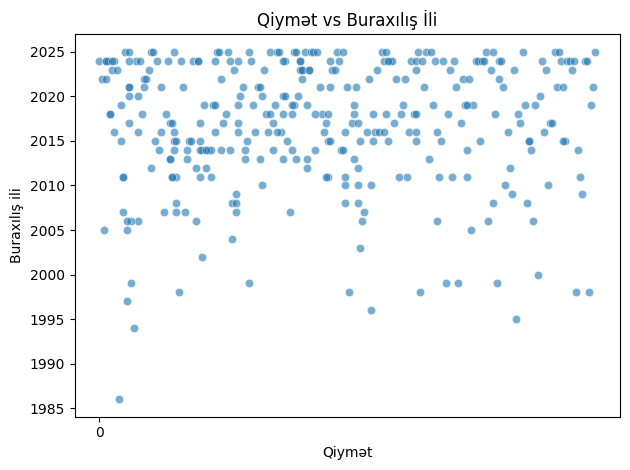

In [14]:
# Sample plot
sns.scatterplot(x="Qiymət", y="Buraxılış ili", data=df, alpha=0.6)

# Restrict x-axis ticks to multiples of 5000 (or any step you want)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=5000))

# Optional: Format with thousand separators
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Add labels and title
plt.title("Qiymət vs Buraxılış İli")
plt.xlabel("Qiymət")
plt.ylabel("Buraxılış ili")

# Show the plot
plt.tight_layout()
plt.show()